<a href="https://colab.research.google.com/github/SattuSupCodes/AI_Colab/blob/main/magic_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import matplotlib.pyplot as mp
import pandas as pd
from sklearn.preprocessing import StandardScaler


# datasets


In [4]:
cols = ["fLength" , "fWidth" , "fSize" , "fConc" , "fAsym" , "fM3Long" , "fM3Trans" , "fAlpha" , "fDist" ,
        "class"]
df = pd.read_csv("magic04.data", names=cols )
df.head()

,fLength,fWidth,fSize,fConc,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [6]:
df["class"] = (df["class"] == "g").astype(int)
df.head()

,fLength,fWidth,fSize,fConc,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,0
31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,0
162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,0
23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,0
75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,0


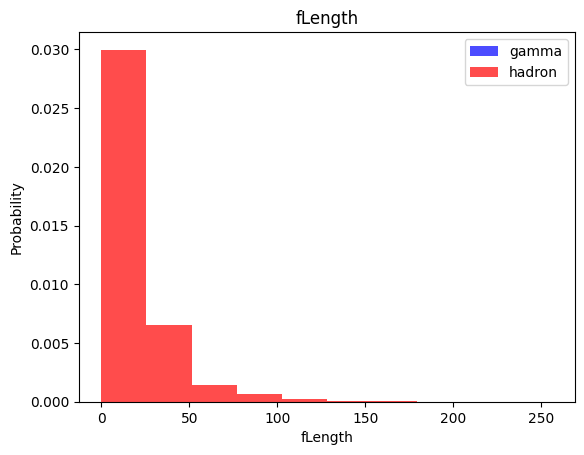

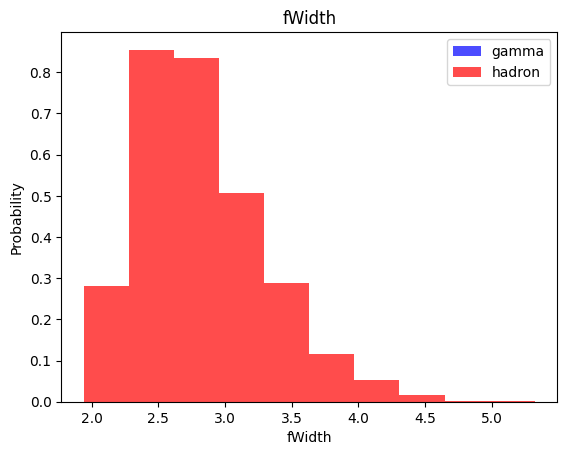

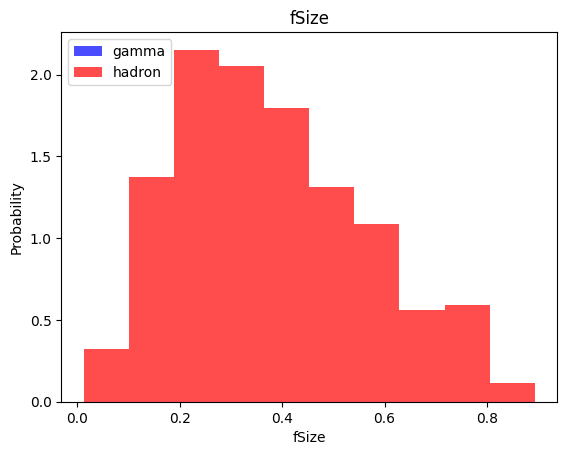

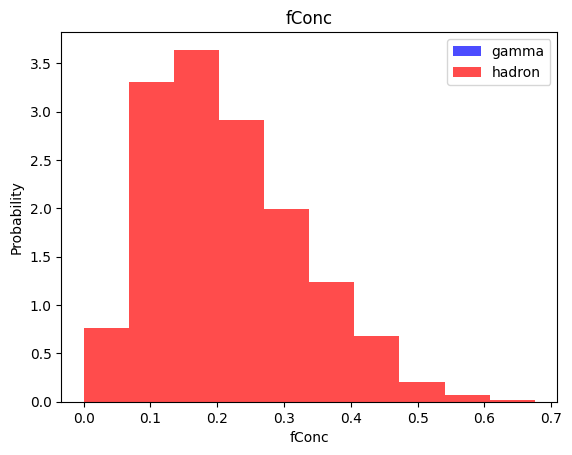

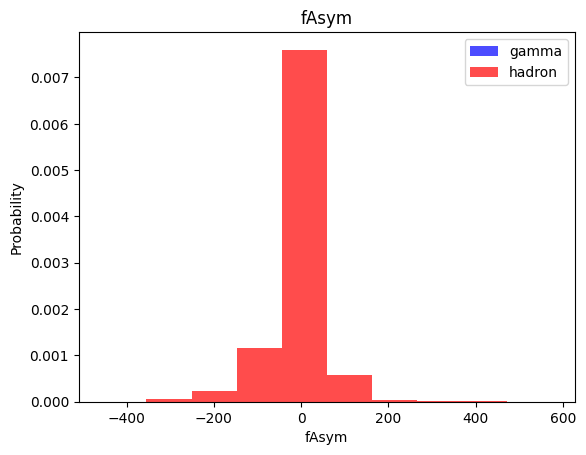

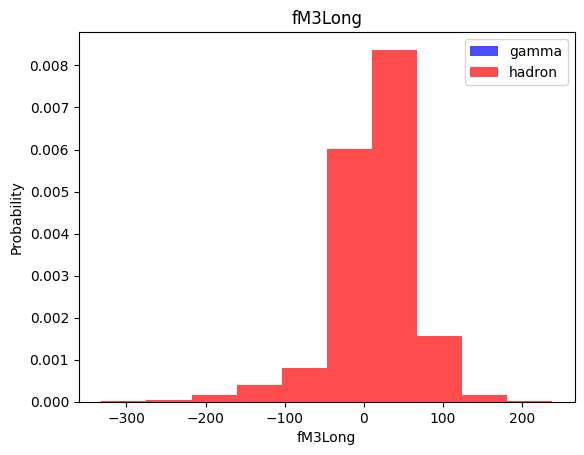

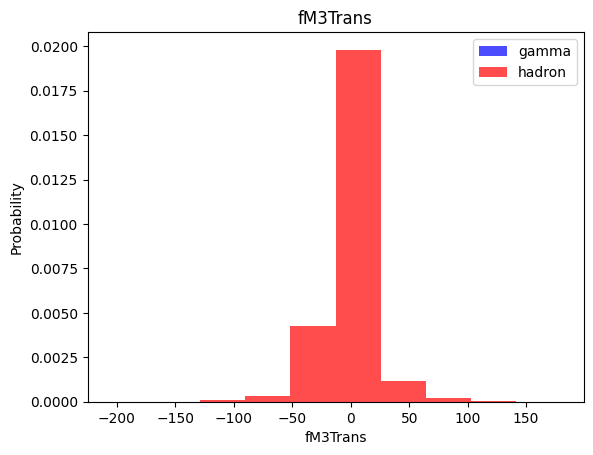

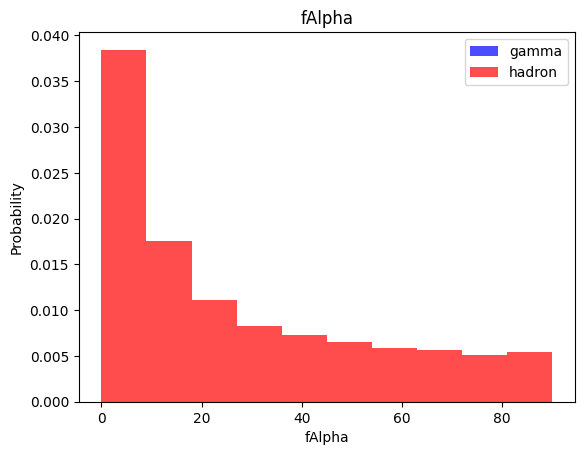

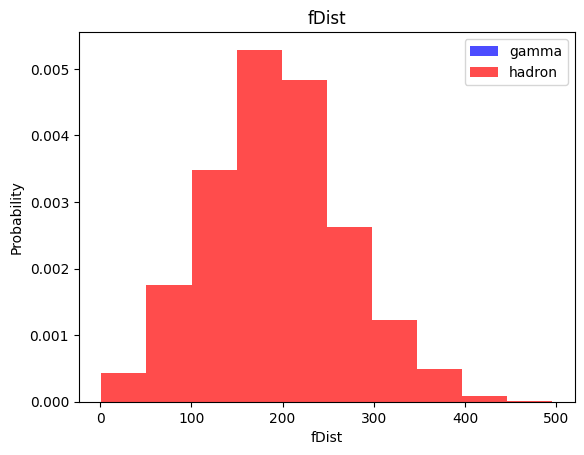

In [12]:
for label in cols[:-1]:
  mp.hist(df[df["class"] == 1][label], color = 'blue' , label = 'gamma' , alpha = 0.7 , density = True)
  mp.hist(df[df["class"] == 0][label], color = 'red' , label = 'hadron' , alpha = 0.7, density = True)
  mp.title(label)
  mp.ylabel("Probability")
  mp.xlabel(label)
  mp.legend()
  mp.show()



# Test and Validation

In [16]:
train, valid, test = np.split(df.sample(frac=1).reset_index(drop=True), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [18]:
def scale_set(dataframe):
  x = dataframe[dataframe.cols[:-1]].values
  y = dataframe[dataframe.cols[-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)
  data = np.hstack((x, np.reshape(y, (-1, 1))))
  return data, x, y